# Introduction

There are two tasks: an algorithm design and a data analysis task. Both tasks were recently encoutered tasks by the data science team at SST. Above all, we are looking for clean, readable code and adherence to standard data science practices. One resource that may help you with the former is a Raymond Hettinger talk on the same subject (https://www.youtube.com/watch?v=OSGv2VnC0go). You do not have to watch it for these exercises, although the principles outlined will be beneficial to any Python developer.

All constraints are explicitly stated, so if something is ambiguous, then you are free to answer as you see fit. Our intent is for this to take no longer than 60-90 minutes, so if you find yourself taking longer, then please answer what you can and explain what you found challenging.


## 1. Algorithm


##### Background
We are looking to visualize a collection of continuous events on a timeline. Some of these events may be overlapping (e.g. end time of event 1 could fall between the start time and end time of event 2). As such, we want to stack these events on different levels, such that there is no overlap in the visualization. 

For example, if three events have start and end time pairs (0, 50), (20, 60), and (55, 100), then the solution could be visualized as the following:

```
                          20                    60
                          |                     |
level 1                   ----------------------
level 0            --------------------    -----------------
                   |                  |    |               |
                   0                  50  55              100  
```
##### Constraints
- You must use the minimum number of required levels to stack the events such that they are not overlapping
- An event must be assigned to the **lowest** unoccupied level
- If two events have the same time, the event in the lowest index in the input list must be placed in the lowest level

##### Input
A **list** of **dictionaries**, where each dictionary has two keys: *'start_time'* and *'end_time'*. The corresponding values for *'start_time'* and *'end_time'* are non-negative integers. 

Sample:
```
sample_input = [
    {
        'start_time': 0,
        'end_time': 50
    }, 
    {
        'start_time': 20,
        'end_time': 60
    }, 
    {
        'start_time': 55,
        'end_time': 100
    }
]
```

##### Output
The output must have the same format as the input (list of dictionaries), but with an additional key:value pair in each dictionary. The key will be named *'level'* and the value will be the integer level assigned to that event.

Sample:
```
sample_input = [
    {
        'start_time': 0,
        'end_time': 50,
        'level': 0
    }, 
    {
        'start_time': 20,
        'end_time': 60,        # event 0 occupies level 0 until time = 50,
        'level': 1             # so level 1 is the lowest unoccupied level
    }, 
    {
        'start_time': 55,
        'end_time': 100,       # event 0 concluded at time = 50, so
        'level': 0             # level 0 is now available again
    }
]
```

##### Given
- end time >= start time
- input list is sorted by start time


*** My code starts here. Let's get going.

In [11]:
simple_sample_input = [
    {
        'start_time': 0,
        'end_time': 50
    }, 
    {
        'start_time': 20,
        'end_time': 60
    }, 
    {
        'start_time': 55,
        'end_time': 100
    }
]


simple_sample_output = [
    {
        'start_time': 0,
        'end_time': 50,
        'level': 0
    }, 
    {
        'start_time': 20,
        'end_time': 60,        # event 0 occupies level 0 until time = 50,
        'level': 1             # so level 1 is the lowest unoccupied level
    }, 
    {
        'start_time': 55,
        'end_time': 100,       # event 0 concluded at time = 50, so
        'level': 0             # level 0 is now available again
    }
]

In [12]:
def add_levels(events: list):
    
    # create data structure that will keep track of the lowest unoccupied level available
    # list of integers: (index of list represents the level, the value at index i represents end time of event at current level)
    end_times = [0]
    
    # iterate over the list of events
    for event in events: 
        
        # create level counter that will be increased if the level is occupied
        counter = 0
    
        # assign a temporary, invalid level to the event
        event['level'] = -1
        
        while event['level'] < 0:  # until the event is not assigned a valid level
            
            # check if the level has more time available than the event's end time
            if event['start_time'] >= end_times[counter]:     
            
                # assign lowest unoccupied available level to the event
                event['level'] = counter

                # keep track of the event's end time in the current level
                end_times[counter] = event['end_time']   

                # reset counter for next event to be scheduled
                counter = 0
                
            else:
                # increment counter to access a higher level
                counter += 1
                
                # if this level does not exist yet, add it to the end_times data structure
                if counter+1 > len(end_times):   # offset by 1 since counter started at 0
                    end_times.append(0)
                    
                # re-run statements in the while loop again
                continue
                
    return events

Let's create a function that can automatically test whether or not the output levels are correct

In [13]:
def test_levels(events_expected: list, events_test: list):
    # for each event in the list of events
    for index, event in enumerate(events_expected):
        
        # if the level of the actual event is the same as the level of the event being tested, then all good, check next event
        if event['level'] == events_test[index]['level']:
            continue
        # return false, since event levels are different, test failed
        else:
            return False
    # test passed
    return True

Now let's check if the add_levels function works correctly or not:

In [14]:
simple_test_output = add_levels(simple_sample_input)

print("simple test passed =", test_levels(simple_sample_output, simple_test_output))

simple test passed = True


It worked. The test has passed.

Now let's add 2 more test cases, which are a bit more complicated, to make sure that we cover other examples, and edge cases.

In [15]:
complex_sample_input = [
    {
        'start_time': 0,
        'end_time': 30
    }, 
    {
        'start_time': 10,
        'end_time': 35         
    }, 
    {
        'start_time': 32,
        'end_time': 35 
    },
    {
        'start_time': 36,
        'end_time': 70
    }, 
    {
        'start_time': 40,
        'end_time': 80 
    }, 
    {
        'start_time': 60,
        'end_time': 100
    },
    {
        'start_time': 75,
        'end_time': 100  
    },
    {
        'start_time': 90,
        'end_time': 100
    }
]

complex_sample_output = [
    {
        'start_time': 0,
        'end_time': 30,
        'level': 0
    }, 
    {
        'start_time': 10,
        'end_time': 35,       
        'level': 1            
    }, 
    {
        'start_time': 32,
        'end_time': 35,       
        'level': 0 
    },
    {
        'start_time': 36,
        'end_time': 70,
        'level': 0
    }, 
    {
        'start_time': 40,
        'end_time': 80,
        'level': 1 
    }, 
    {
        'start_time': 60,
        'end_time': 100,
        'level': 2  
    },
    {
        'start_time': 75,
        'end_time': 100,
        'level': 0  
    },
    {
        'start_time': 90,
        'end_time': 100,
        'level': 1 
    }
]

edge_case_sample_input = [
    {
        'start_time': 0,
        'end_time': 30
    }, 
    {
        'start_time': 0,
        'end_time': 30       
    }, 
    {
        'start_time': 31,
        'end_time': 50
    },
    {
        'start_time': 31,
        'end_time': 50
    }, 
    {
        'start_time': 31,
        'end_time': 50
    }
]

edge_case_sample_output = [
    {
        'start_time': 0,
        'end_time': 30,
        'level': 0
    }, 
    {
        'start_time': 0,
        'end_time': 30,       
        'level': 1            
    }, 
    {
        'start_time': 31,
        'end_time': 50,       
        'level': 0 
    },
    {
        'start_time': 31,
        'end_time': 50,
        'level': 1
    }, 
    {
        'start_time': 31,
        'end_time': 50,
        'level': 2 
    }
]

Let's test the complex example:

In [16]:
complex_test_output = add_levels(complex_sample_input)

print("complex test passed =", test_levels(complex_sample_output, complex_test_output))

complex test passed = True


It passed.

Now let's test an edge case based on the same length events.

In [17]:
edge_case_test_output = add_levels(edge_case_sample_input)

print("edge case test passed =", test_levels(edge_case_sample_output, edge_case_test_output))

edge case test passed = True


It passed too. Great! I can now say that my add_levels function works.

## 2. EDA

##### Background
In the attached CSV, `tasks.csv`, there are a collection of tasks performed by different analysts. 

Different task types are denoted by different stage IDs, and different analysts are denoted by different analyst IDs. Not all analysts perform the same task types (i.e., stage IDs).

The nature of the task type is not important, but note that the file associated with a particular task has a duration (`file_duration` column).

##### Output
Who is/are the most productive analyst(s)? Please write your answer at the end of your research, and include 1-2 sentences with your reasoning.

##### Data Import 

In [18]:
import pandas as pd
tasks = pd.read_csv('tasks.csv')
tasks.head()

,task_id,file_duration,stage_id,analyst_id,assigned_time,completion_time
0,28285,15340,27,19,2020-08-06 11:22:09,2020-08-06 11:59:29
1,28145,14277,107,19,2020-08-06 12:44:05,2020-08-06 16:01:04
2,27915,18381,57,99,2020-08-06 13:42:08,2020-08-10 12:30:39
3,45255,86400,17,139,2020-08-12 09:48:15,2020-08-12 10:11:27
4,28445,28433,107,149,2020-08-06 12:36:37,2020-08-07 09:23:20


In [19]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   task_id          412 non-null    int64 
 1   file_duration    412 non-null    int64 
 2   stage_id         412 non-null    int64 
 3   analyst_id       412 non-null    int64 
 4   assigned_time    412 non-null    object
 5   completion_time  412 non-null    object
dtypes: int64(4), object(2)
memory usage: 19.4+ KB


##### Data Pre-processing

1. Pre-processing needed:
    - convert assigned and completion time into datetimes

In [21]:
tasks['assigned_time'] = pd.to_datetime(tasks.apply(lambda x: x['assigned_time'], axis=1), format='%Y-%m-%d %H:%M:%S')
tasks['completion_time'] = pd.to_datetime(tasks.apply(lambda x: x['completion_time'], axis=1), format='%Y-%m-%d %H:%M:%S')

In [22]:
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   task_id          412 non-null    int64         
 1   file_duration    412 non-null    int64         
 2   stage_id         412 non-null    int64         
 3   analyst_id       412 non-null    int64         
 4   assigned_time    412 non-null    datetime64[ns]
 5   completion_time  412 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(4)
memory usage: 19.4 KB


2. Check for missing values:
    - It does not seem like there are any, but let's double check:

In [23]:
tasks.isnull().sum()

task_id            0
file_duration      0
stage_id           0
analyst_id         0
assigned_time      0
completion_time    0
dtype: int64

##### Feature Engineering

I would like to create a feature called time to complete, which is just a subtraction of assigned_time from completion_time

In [24]:
tasks['time_to_complete'] = tasks['completion_time'] - tasks['assigned_time']

In [25]:
tasks['numerical_time_to_complete'] = tasks['time_to_complete'].values.astype(np.int64)

I will store a numerical representation of the time_to_complete feature, since I will have to use it later for sorting different analysts' completion times, then rank them 

In [26]:
tasks.head()

,task_id,file_duration,stage_id,analyst_id,assigned_time,completion_time,time_to_complete,numerical_time_to_complete
0,28285,15340,27,19,2020-08-06 11:22:09,2020-08-06 11:59:29,0 days 00:37:20,2240000000000
1,28145,14277,107,19,2020-08-06 12:44:05,2020-08-06 16:01:04,0 days 03:16:59,11819000000000
2,27915,18381,57,99,2020-08-06 13:42:08,2020-08-10 12:30:39,3 days 22:48:31,341311000000000
3,45255,86400,17,139,2020-08-12 09:48:15,2020-08-12 10:11:27,0 days 00:23:12,1392000000000
4,28445,28433,107,149,2020-08-06 12:36:37,2020-08-07 09:23:20,0 days 20:46:43,74803000000000


#####  EDA

Let's see how many types of stage_id's are

In [27]:
set(tasks['stage_id'])

{17, 27, 37, 57, 107}

In [28]:
tasks['stage_id'].value_counts()

107    134
17     110
57      63
27      60
37      45
Name: stage_id, dtype: int64

So there are 5 types of tasks. 

Stage ID #107 and #17 are the most popular ones, both having over 100 analysts completing them.

Let's see how we can get the average completion time for these 5 types of tasks.

In [29]:
pd.to_timedelta(tasks.groupby('stage_id').mean()['numerical_time_to_complete'])

stage_id
17    0 days 00:26:25.627272727
27    0 days 01:51:44.816666666
37    1 days 07:58:35.288888888
57    1 days 14:48:55.809523809
107   0 days 06:02:51.835820895
Name: numerical_time_to_complete, dtype: timedelta64[ns]

Great!

So it looks like task #57 and #37 on average take more than 1 day, while the rest of the task on average can be finished up in under 1 day.

Let's see how we can visualize some completion times for these stage id's.

In [30]:
tasks['completion_minutes'] = tasks['time_to_complete'].dt.total_seconds() / 60

In [31]:
tasks.head()

,task_id,file_duration,stage_id,analyst_id,assigned_time,completion_time,time_to_complete,numerical_time_to_complete,completion_minutes
0,28285,15340,27,19,2020-08-06 11:22:09,2020-08-06 11:59:29,0 days 00:37:20,2240000000000,37.333333
1,28145,14277,107,19,2020-08-06 12:44:05,2020-08-06 16:01:04,0 days 03:16:59,11819000000000,196.983333
2,27915,18381,57,99,2020-08-06 13:42:08,2020-08-10 12:30:39,3 days 22:48:31,341311000000000,5688.516667
3,45255,86400,17,139,2020-08-12 09:48:15,2020-08-12 10:11:27,0 days 00:23:12,1392000000000,23.200000
4,28445,28433,107,149,2020-08-06 12:36:37,2020-08-07 09:23:20,0 days 20:46:43,74803000000000,1246.716667


##### EDA - Data Visualization

Let's slice the master data set into smaller subsets based on different stage_id values, so we can visualize the distribution of times it took to complete a specific task type

In [32]:
stageID_17 = tasks[tasks['stage_id'] == 17]
stageID_27 = tasks[tasks['stage_id'] == 27]
stageID_37 = tasks[tasks['stage_id'] == 37]
stageID_57 = tasks[tasks['stage_id'] == 57]
stageID_107 = tasks[tasks['stage_id'] == 107]

In [33]:
stageID_17

,task_id,file_duration,stage_id,analyst_id,assigned_time,completion_time,time_to_complete,numerical_time_to_complete,completion_minutes
3,45255,86400,17,139,2020-08-12 09:48:15,2020-08-12 10:11:27,0 days 00:23:12,1392000000000,23.200000
11,32745,86400,17,149,2020-08-06 11:20:10,2020-08-06 12:36:35,0 days 01:16:25,4585000000000,76.416667
12,45305,86400,17,149,2020-08-12 09:20:43,2020-08-12 09:51:59,0 days 00:31:16,1876000000000,31.266667
15,34835,86400,17,109,2020-08-06 11:57:43,2020-08-06 14:04:05,0 days 02:06:22,7582000000000,126.366667
16,34735,86400,17,139,2020-08-06 12:24:45,2020-08-06 12:51:45,0 days 00:27:00,1620000000000,27.000000
...,...,...,...,...,...,...,...,...,...
397,49895,86400,17,159,2020-08-28 10:47:18,2020-08-28 10:47:19,0 days 00:00:01,1000000000,0.016667
398,49885,86400,17,299,2020-08-27 08:55:33,2020-08-27 09:52:25,0 days 00:56:52,3412000000000,56.866667
400,49935,86400,17,319,2020-08-27 10:10:10,2020-08-27 10:36:54,0 days 00:26:44,1604000000000,26.733333
401,49915,86400,17,159,2020-08-28 10:48:53,2020-08-28 10:48:54,0 days 00:00:01,1000000000,0.016667


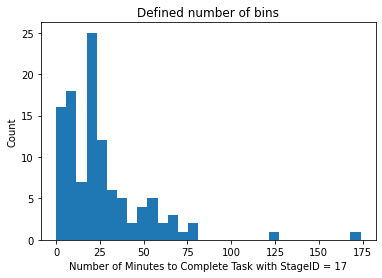

In [34]:
plt.hist(stageID_17['completion_minutes'], bins=30)
plt.title('Defined number of bins')
plt.xlabel('Number of Minutes to Complete Task with StageID = 17')
plt.ylabel('Count')

plt.show()

Most completion times for task type 17 are well under 1 hour. Most analysts completed this type of task in 25 minutes, while other analysts managed to complete it much faster, even under 10 minutes. However, there are some outlier analysts that completed it in 2-2.5 hours

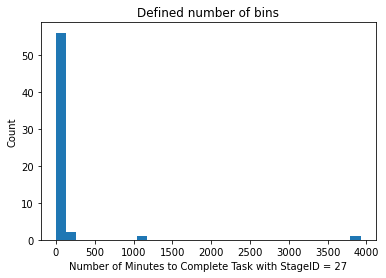

In [35]:
plt.hist(stageID_27['completion_minutes'], bins=30)
plt.title ('Defined number of bins')
plt.xlabel ('Number of Minutes to Complete Task with StageID = 27')
plt.ylabel ('Count')

plt.show()

Here, for task type 27 most anaysts complete it in less thatn 500 minutes, however there are outliers again at just over 1000 minutes, and just close to 4000 minutes.

For more complex analysis the outliers need to be detected, and perhaps removed from the master data set.

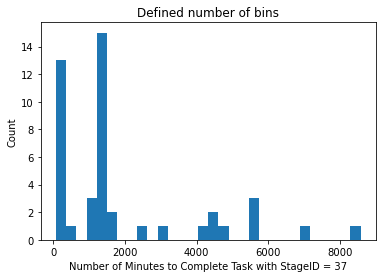

In [36]:
plt.hist(stageID_37['completion_minutes'], bins=30)
plt.title('Defined number of bins')
plt.xlabel('Number of Minutes to Complete Task with StageID = 37')
plt.ylabel('Count')

plt.show()

Most completion times for task type 37 are well under 2000 minutes, which is just over 33 hours. Some analysts needed more time, by going over 4000 minutes, which is over 66 hours, thus we can definitely see that this type of task is one of the very long tasks that usually takes days.

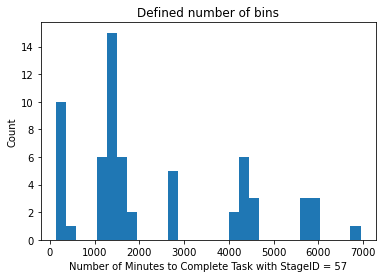

In [37]:
plt.hist(stageID_57['completion_minutes'], bins=30)
plt.title ('Defined number of bins')
plt.xlabel ('Number of Minutes to Complete Task with StageID = 57')
plt.ylabel ('Count')

plt.show()

Task type 57 has quite a large variety of completion times. Some analysts completed pretty fast, but the majority of analysts require more than 1000 minutes. 

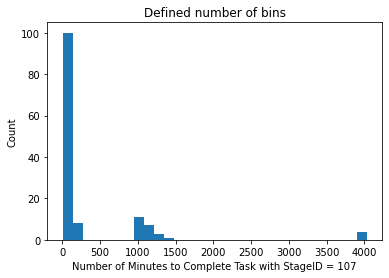

In [38]:
plt.hist(stageID_107['completion_minutes'], bins=30)
plt.title('Defined number of bins')
plt.xlabel('Number of Minutes to Complete Task with StageID = 107')
plt.ylabel('Count')

plt.show()

Finally, for task 107 most analysts complete this task under 300 minutes, but there are quite a few outlier analysts who need over 1000 minutes to complete the task. Some even over 4000 minutes. 

##### Who is/are the most productive analyst(s)?

My algorithm to answer this question is simple:
 1. Choose a unit of time to measure for completion of a task (I suppose minutes or hours would be a good choice)
 2. Segment or groupby the data set by different stage_id, the sort this subset of data by the number of minutes it took to complete the task (ascending order)
 3. Create a rank column that ranks this sorting from 1 to n (n being the number of people who completed this type of task), and rank number one would be the analyst who completed the task first
 4. Create a point system to reward the most productive analysts for each task.The higher an analysts ranked on a specific task type, the more points they get
 5. Aggregate number of points for each analyst, and divide the total points by the number of tasks they completed multiplied with the max points that one could get for a task
 6. Sort list of "normalized points" in descending order, and you will have the most productive analysts at the top of the list
 
 
 To make step 5 easier, I designed a simple system. Let's say 30 people complete a task. The analysts who completes it the fastest gets 30/30 (= 1 point)... the next person who completes the task gets 29/30 (= 0.9667 points)....
 
 This way the max value for a task completed is 1, thus when we normalize, we just need to divide the total number of points with the number of tasks completed

In [39]:
stageID_107.sort_values(by='completion_minutes')

,task_id,file_duration,stage_id,analyst_id,assigned_time,completion_time,time_to_complete,numerical_time_to_complete,completion_minutes
372,48445,18149,107,69,2020-08-25 14:40:22,2020-08-25 14:41:13,0 days 00:00:51,51000000000,0.850000
343,48455,23917,107,69,2020-08-25 14:41:14,2020-08-25 14:42:34,0 days 00:01:20,80000000000,1.333333
118,44715,6511,107,139,2020-08-11 11:20:33,2020-08-11 11:39:39,0 days 00:19:06,1146000000000,19.100000
101,45005,17677,107,139,2020-08-11 11:39:41,2020-08-11 12:03:12,0 days 00:23:31,1411000000000,23.516667
283,47355,4518,107,139,2020-08-20 10:59:26,2020-08-20 11:24:09,0 days 00:24:43,1483000000000,24.716667
...,...,...,...,...,...,...,...,...,...
404,49785,16620,107,139,2020-08-26 15:59:33,2020-08-27 15:14:20,0 days 23:14:47,83687000000000,1394.783333
199,46185,21759,107,139,2020-08-14 16:10:29,2020-08-17 09:26:03,2 days 17:15:34,234934000000000,3915.566667
302,48095,15207,107,149,2020-08-21 15:00:05,2020-08-24 08:38:20,2 days 17:38:15,236295000000000,3938.250000
300,48125,9316,107,139,2020-08-21 14:53:58,2020-08-24 08:38:44,2 days 17:44:46,236686000000000,3944.766667


Let's rank the analysts based on their completion times

In [40]:
stageID_107['Rank'] = stageID_107['completion_minutes'].rank(ascending = True) 

Now we can calculate the amount of points they should get, which is:

((Total Number of analysts completing the task + 1) - the rank of each analyst) divided by the Number of analysts who completed the task 

The rank starts at 1, so that's why we need to offset by 1 in the equation

Example:

for the analyst ranked #1 out of 30: ((30 + 1) - 1)/ 30 = 30/30 points =     1 point

for the analyst ranked #2 out of 30: ((30 + 1) - 2)/ 30 = 29/30 points = 0.966 points

In [41]:
stageID_107['Points'] = ((len(stageID_107) + 1) - stageID_107['Rank']) / len(stageID_107)

In [42]:
stageID_107.sort_values(by='completion_minutes')

,task_id,file_duration,stage_id,analyst_id,assigned_time,completion_time,time_to_complete,numerical_time_to_complete,completion_minutes,Rank,Points
372,48445,18149,107,69,2020-08-25 14:40:22,2020-08-25 14:41:13,0 days 00:00:51,51000000000,0.850000,1.0,1.000000
343,48455,23917,107,69,2020-08-25 14:41:14,2020-08-25 14:42:34,0 days 00:01:20,80000000000,1.333333,2.0,0.992537
118,44715,6511,107,139,2020-08-11 11:20:33,2020-08-11 11:39:39,0 days 00:19:06,1146000000000,19.100000,3.0,0.985075
101,45005,17677,107,139,2020-08-11 11:39:41,2020-08-11 12:03:12,0 days 00:23:31,1411000000000,23.516667,4.0,0.977612
283,47355,4518,107,139,2020-08-20 10:59:26,2020-08-20 11:24:09,0 days 00:24:43,1483000000000,24.716667,5.0,0.970149
...,...,...,...,...,...,...,...,...,...,...,...
404,49785,16620,107,139,2020-08-26 15:59:33,2020-08-27 15:14:20,0 days 23:14:47,83687000000000,1394.783333,130.0,0.037313
199,46185,21759,107,139,2020-08-14 16:10:29,2020-08-17 09:26:03,2 days 17:15:34,234934000000000,3915.566667,131.0,0.029851
302,48095,15207,107,149,2020-08-21 15:00:05,2020-08-24 08:38:20,2 days 17:38:15,236295000000000,3938.250000,132.0,0.022388
300,48125,9316,107,139,2020-08-21 14:53:58,2020-08-24 08:38:44,2 days 17:44:46,236686000000000,3944.766667,133.0,0.014925


Due this with the rest of the task types

In [43]:
stageID_17['Rank'] = stageID_17['completion_minutes'].rank(ascending = True) 
stageID_17['Points'] = ((len(stageID_17) + 1) - stageID_17['Rank']) / len(stageID_17)

stageID_27['Rank'] = stageID_27['completion_minutes'].rank(ascending = True) 
stageID_27['Points'] = ((len(stageID_27) + 1) - stageID_27['Rank']) / len(stageID_27)

stageID_37['Rank'] = stageID_37['completion_minutes'].rank(ascending = True) 
stageID_37['Points'] = ((len(stageID_37) + 1) - stageID_37['Rank']) / len(stageID_37)

stageID_57['Rank'] = stageID_57['completion_minutes'].rank(ascending = True) 
stageID_57['Points'] = ((len(stageID_57) + 1) - stageID_57['Rank']) / len(stageID_57)

Manually check for all data subsets that the highest ranked analysts are the fastest task completers, and they get the most amount of points as well

In [44]:
stageID_17.sort_values(by='completion_minutes')

,task_id,file_duration,stage_id,analyst_id,assigned_time,completion_time,time_to_complete,numerical_time_to_complete,completion_minutes,Rank,Points
410,49905,86400,17,159,2020-08-28 10:44:02,2020-08-28 10:44:03,0 days 00:00:01,1000000000,0.016667,2.0,0.990909
397,49895,86400,17,159,2020-08-28 10:47:18,2020-08-28 10:47:19,0 days 00:00:01,1000000000,0.016667,2.0,0.990909
401,49915,86400,17,159,2020-08-28 10:48:53,2020-08-28 10:48:54,0 days 00:00:01,1000000000,0.016667,2.0,0.990909
322,48555,86400,17,149,2020-08-24 09:31:23,2020-08-24 09:33:40,0 days 00:02:17,137000000000,2.283333,4.0,0.972727
332,48565,86400,17,149,2020-08-24 09:38:15,2020-08-24 09:41:19,0 days 00:03:04,184000000000,3.066667,5.0,0.963636
...,...,...,...,...,...,...,...,...,...,...,...
48,44165,86400,17,119,2020-08-07 09:05:20,2020-08-07 10:19:09,0 days 01:13:49,4429000000000,73.816667,106.0,0.045455
11,32745,86400,17,149,2020-08-06 11:20:10,2020-08-06 12:36:35,0 days 01:16:25,4585000000000,76.416667,107.0,0.036364
391,49535,86400,17,309,2020-08-26 11:20:07,2020-08-26 12:39:38,0 days 01:19:31,4771000000000,79.516667,108.0,0.027273
15,34835,86400,17,109,2020-08-06 11:57:43,2020-08-06 14:04:05,0 days 02:06:22,7582000000000,126.366667,109.0,0.018182


In [45]:
stageID_27.sort_values(by='completion_minutes')

,task_id,file_duration,stage_id,analyst_id,assigned_time,completion_time,time_to_complete,numerical_time_to_complete,completion_minutes,Rank,Points
39,34145,16109,27,69,2020-08-07 09:26:43,2020-08-07 09:28:15,0 days 00:01:32,92000000000,1.533333,1.0,1.000000
192,46095,16191,27,59,2020-08-14 10:21:19,2020-08-14 10:25:34,0 days 00:04:15,255000000000,4.250000,2.0,0.983333
103,44725,6511,27,139,2020-08-10 12:10:47,2020-08-10 12:17:35,0 days 00:06:48,408000000000,6.800000,3.0,0.966667
144,45725,6966,27,39,2020-08-12 15:03:11,2020-08-12 15:10:52,0 days 00:07:41,461000000000,7.683333,4.0,0.950000
183,46425,11682,27,59,2020-08-14 09:46:19,2020-08-14 09:54:27,0 days 00:08:08,488000000000,8.133333,5.0,0.933333
143,45715,5783,27,39,2020-08-12 15:10:54,2020-08-12 15:19:34,0 days 00:08:40,520000000000,8.666667,6.0,0.916667
100,44745,29854,27,139,2020-08-10 15:14:03,2020-08-10 15:23:42,0 days 00:09:39,579000000000,9.650000,7.0,0.900000
193,46265,14148,27,59,2020-08-14 09:36:19,2020-08-14 09:46:11,0 days 00:09:52,592000000000,9.866667,8.0,0.883333
180,46305,18791,27,59,2020-08-14 10:06:22,2020-08-14 10:16:41,0 days 00:10:19,619000000000,10.316667,9.0,0.866667
209,46635,10184,27,139,2020-08-14 15:59:33,2020-08-14 16:10:27,0 days 00:10:54,654000000000,10.900000,10.0,0.850000


In [46]:
stageID_37.sort_values(by='completion_minutes')

,task_id,file_duration,stage_id,analyst_id,assigned_time,completion_time,time_to_complete,numerical_time_to_complete,completion_minutes,Rank,Points
411,48765,7529,37,119,2020-08-28 09:54:00,2020-08-28 11:13:19,0 days 01:19:19,4759000000000,79.316667,1.0,1.000000
341,48615,9316,37,119,2020-08-27 10:51:09,2020-08-27 12:17:22,0 days 01:26:13,5173000000000,86.216667,2.0,0.977778
311,47875,4518,37,119,2020-08-24 14:30:09,2020-08-24 16:49:58,0 days 02:19:49,8389000000000,139.816667,3.0,0.955556
309,48005,8334,37,119,2020-08-25 08:50:17,2020-08-25 11:53:20,0 days 03:03:03,10983000000000,183.050000,4.0,0.933333
98,44825,5351,37,119,2020-08-19 10:10:24,2020-08-19 13:52:38,0 days 03:42:14,13334000000000,222.233333,5.0,0.911111
67,44865,9925,37,119,2020-08-17 11:46:38,2020-08-17 15:45:17,0 days 03:58:39,14319000000000,238.650000,6.0,0.888889
314,48025,13843,37,119,2020-08-25 11:53:26,2020-08-25 16:01:30,0 days 04:08:04,14884000000000,248.066667,7.0,0.866667
353,48625,15207,37,119,2020-08-27 12:18:33,2020-08-27 16:30:57,0 days 04:12:24,15144000000000,252.400000,8.0,0.844444
277,47815,12444,37,109,2020-08-24 09:51:13,2020-08-24 14:33:31,0 days 04:42:18,16938000000000,282.300000,9.0,0.822222
53,44395,16109,37,49,2020-08-13 12:12:01,2020-08-13 17:11:55,0 days 04:59:54,17994000000000,299.900000,10.0,0.800000


In [47]:
stageID_57.sort_values(by='completion_minutes')

,task_id,file_duration,stage_id,analyst_id,assigned_time,completion_time,time_to_complete,numerical_time_to_complete,completion_minutes,Rank,Points
139,44895,3815,57,99,2020-08-11 14:58:41,2020-08-11 17:16:09,0 days 02:17:28,8248000000000,137.466667,1.0,1.000000
80,45155,6511,57,99,2020-08-13 09:51:11,2020-08-13 12:49:03,0 days 02:57:52,10672000000000,177.866667,2.0,0.984127
373,48605,15207,57,39,2020-08-25 12:16:10,2020-08-25 15:19:34,0 days 03:03:24,11004000000000,183.400000,3.0,0.968254
66,44815,9925,57,39,2020-08-11 12:11:21,2020-08-11 16:04:39,0 days 03:53:18,13998000000000,233.300000,4.0,0.952381
157,44945,10461,57,39,2020-08-12 11:02:39,2020-08-12 15:03:08,0 days 04:00:29,14429000000000,240.483333,5.0,0.936508
...,...,...,...,...,...,...,...,...,...,...,...
2,27915,18381,57,99,2020-08-06 13:42:08,2020-08-10 12:30:39,3 days 22:48:31,341311000000000,5688.516667,59.0,0.079365
84,45115,17677,57,29,2020-08-13 11:07:44,2020-08-17 14:21:00,4 days 03:13:16,357196000000000,5953.266667,60.0,0.063492
196,45375,21931,57,19,2020-08-14 10:44:36,2020-08-18 14:23:35,4 days 03:38:59,358739000000000,5978.983333,61.0,0.047619
166,45525,20480,57,99,2020-08-13 12:49:05,2020-08-17 16:36:05,4 days 03:47:00,359220000000000,5987.000000,62.0,0.031746


All rankings and point systems look good, so now we can merge them back into the master data set

In [48]:
tasks_merged = pd.concat([stageID_17, stageID_27, stageID_37, stageID_57, stageID_107], ignore_index=True)

In [49]:
tasks_merged

,task_id,file_duration,stage_id,analyst_id,assigned_time,completion_time,time_to_complete,numerical_time_to_complete,completion_minutes,Rank,Points
0,45255,86400,17,139,2020-08-12 09:48:15,2020-08-12 10:11:27,0 days 00:23:12,1392000000000,23.200000,67.0,0.400000
1,32745,86400,17,149,2020-08-06 11:20:10,2020-08-06 12:36:35,0 days 01:16:25,4585000000000,76.416667,107.0,0.036364
2,45305,86400,17,149,2020-08-12 09:20:43,2020-08-12 09:51:59,0 days 00:31:16,1876000000000,31.266667,80.5,0.277273
3,34835,86400,17,109,2020-08-06 11:57:43,2020-08-06 14:04:05,0 days 02:06:22,7582000000000,126.366667,109.0,0.018182
4,34735,86400,17,139,2020-08-06 12:24:45,2020-08-06 12:51:45,0 days 00:27:00,1620000000000,27.000000,75.0,0.327273
...,...,...,...,...,...,...,...,...,...,...,...
407,49845,12206,107,149,2020-08-27 14:15:44,2020-08-27 15:34:35,0 days 01:18:51,4731000000000,78.850000,62.0,0.544776
408,49805,20272,107,299,2020-08-27 14:41:00,2020-08-27 15:58:52,0 days 01:17:52,4672000000000,77.866667,60.0,0.559701
409,49825,16879,107,139,2020-08-27 15:14:21,2020-08-27 16:08:11,0 days 00:53:50,3230000000000,53.833333,34.0,0.753731
410,49865,16310,107,299,2020-08-27 15:59:36,2020-08-28 09:17:54,0 days 17:18:18,62298000000000,1038.300000,110.0,0.186567


Let's calculate the total number of points each analyt collected

In [50]:
total_points = tasks_merged.groupby('analyst_id')['Points'].sum()
total_points

analyst_id
19      4.190121
29      6.445546
39     15.524603
49      4.866667
59     19.209465
69     12.192976
99      3.357937
109     5.702593
119    14.279587
139    58.885075
149    58.871891
159     2.972727
299     0.955360
309     0.218182
319     0.827273
Name: Points, dtype: float64

Looks good, so now let's see the total number of tasks that each analyst has completed

In [51]:
total_tasks_completed = tasks_merged.groupby('analyst_id')['task_id'].agg(np.size)
total_tasks_completed

analyst_id
19      17
29      13
39      23
49      12
59      33
69      20
99       8
109     15
119     26
139    108
149    125
159      3
299      4
309      2
319      3
Name: task_id, dtype: int64

Finally, the productivity scores can be calculated by dividing the total number of points by the number of tasks completed

In [52]:
productivity_scores = total_points / total_tasks_completed
productivity_scores

analyst_id
19     0.246478
29     0.495811
39     0.674983
49     0.405556
59     0.582105
69     0.609649
99     0.419742
109    0.380173
119    0.549215
139    0.545232
149    0.470975
159    0.990909
299    0.238840
309    0.109091
319    0.275758
dtype: float64

Last step, sort the productivity_scores in descending order and you can see the top-n most productive analysts

In [53]:
productivity_scores.sort_values(ascending = False)

analyst_id
159    0.990909
39     0.674983
69     0.609649
59     0.582105
119    0.549215
139    0.545232
29     0.495811
149    0.470975
99     0.419742
49     0.405556
109    0.380173
319    0.275758
19     0.246478
299    0.238840
309    0.109091
dtype: float64

These are the results. Based on my analysis the top-5 most productive analysts are analyst_id 159, 39, 69, 59, 119, in descending order.

My analysis did not take into consideration file_duration, as I did not fully understand how those values are measured, and most importantly what exactly do they mean. During the data set exploration I noticed that some file_duration values are smaller for longer tasks that took days, while some file_duration values were much larger for short tasks.

Due to this issue I created by own time_to_complete feature, which then got transformed into minutes_completed. My ranking system is purely driven by the fastest / most productive analysts being ranked based on their completion times, and being rewarded the most amount of points if they completed a task type faster than their collegues. 

At the end all the points are being summed up, then normalized based on the number of tasks each analyst completed.

An alternative analysts strategy could have been counting and ranking productivity based on the number of tasks each analysts completed, but I decided that without further details and more knowledge about the task assignments, and task deadlines this tpe of analysis could be biased, since some task types take longer than other task types.